In [22]:
%matplotlib inline
import math
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from glob import glob
from PIL import Image
import os
import matplotlib.pylab as plt
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from subprocess import check_output

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_filename = os.listdir('train')
test_filename = os.listdir('test')
n_train = len(os.listdir('train'))
n_test = len(os.listdir('test'))
print n_train
print n_test

9850
15610


In [3]:
sample_test_img =  os.listdir('test')[:20]

In [4]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


In [5]:
def plot_images(filenames, table_size, labels = '', traintest = 'train'):
    imgs_filename = [traintest + '/' + str(filename) for filename in filenames]
    imgs = [plt.imread(filename) for filename in imgs_filename]
    figure = plt.figure(figsize=(20, 10))
    rows, cols = table_size
    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if not np.all(labels == ''):
            subplot.set_title(labels[i], fontsize=10)
        subplot.imshow(imgs[i], cmap='gray')
    plt.tight_layout()
    plt.show()

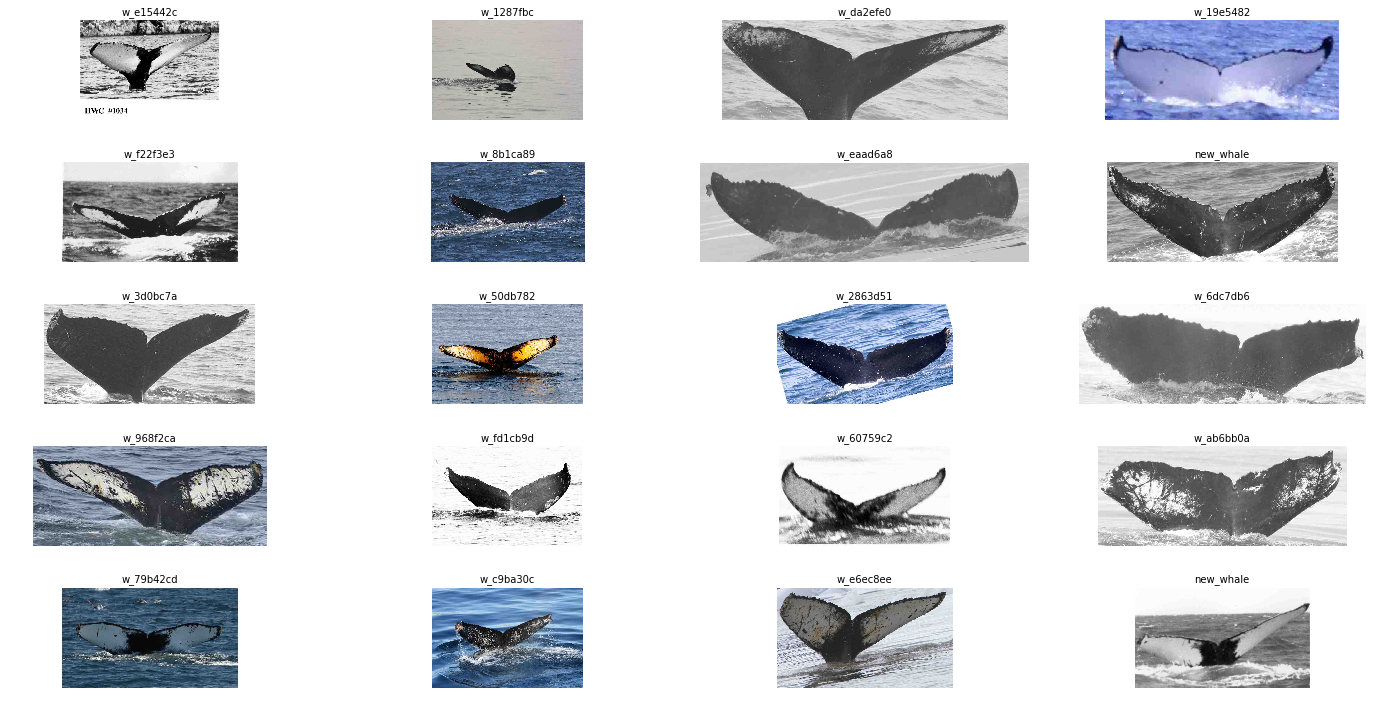

In [6]:
plot_images(train_df.Image[:20], (5,4) ,train_df.Id[:20], 'train')

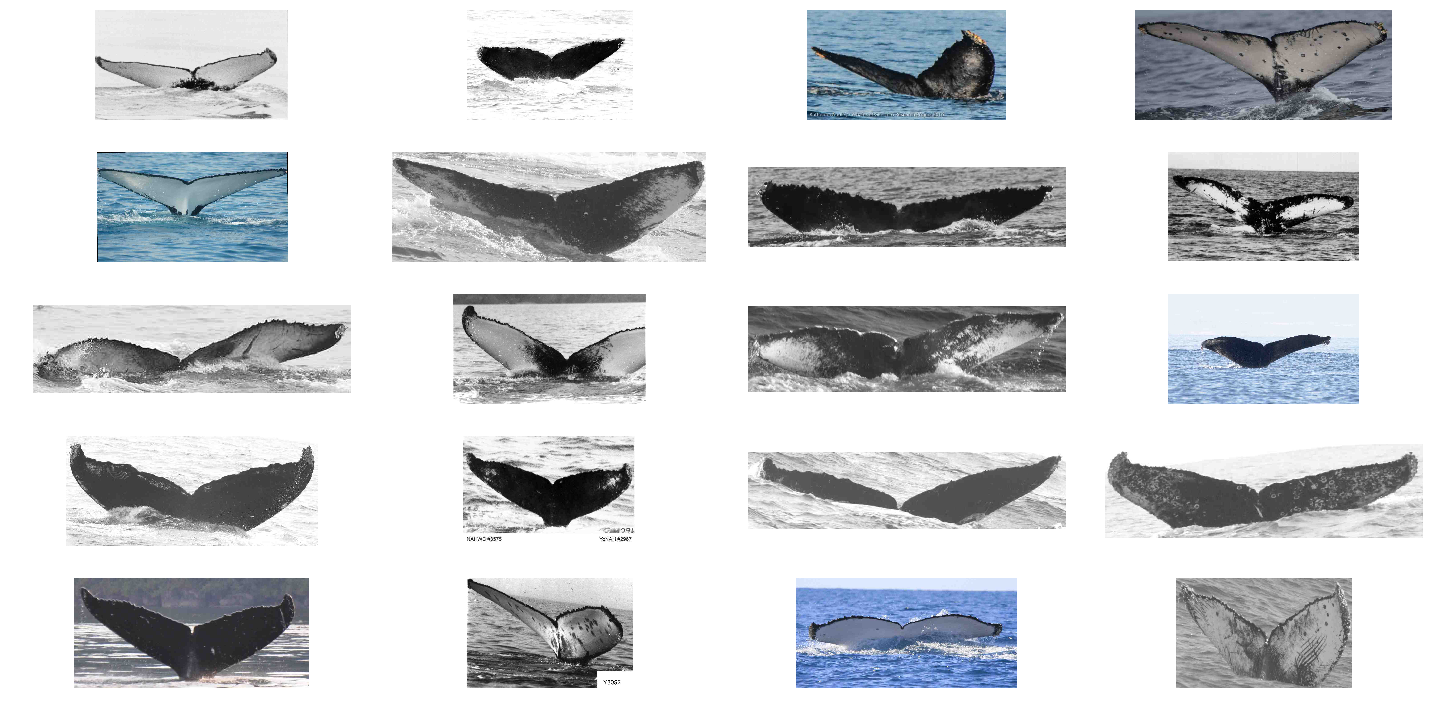

In [7]:
plot_images(sample_test_img, (5,4), '', 'test')

In [50]:
n_unique = len(train_df['Id'].unique())
print "Number of Unique Categories : " + str(n_unique)

Number of Unique Categories : 4251


Text(0.5,1,u'Number of images within category')

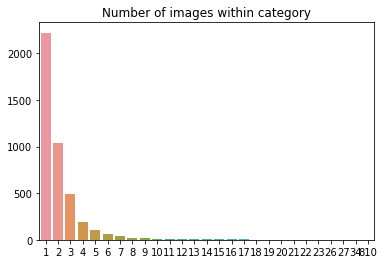

In [10]:
count_categories = dict(Counter(train_df['Id'].value_counts().values))
sns.barplot(count_categories.keys(),count_categories.values()).set_title('Number of images within category')

In [93]:
train_fullpath = ['train/'+ filename for filename in train_df.Image.values]
train_img_sizes = [Image.open(image).size for image in train_fullpath]
count_train_img_sizes = Counter(train_img_sizes)
test_fullpath = ['test/'+ filename for filename in test_filename]
test_img_sizes = [Image.open(image).size for image in test_fullpath]
count_test_train_img_sizes = Counter(test_img_sizes)

In [13]:
print min(train_img_sizes)
print min(test_img_sizes)

(64, 30)
(138, 79)


In [88]:
len([1 for imgsize in count_train_img_sizes if (imgsize[0] < 600) and (imgsize[1] < 400)])

343

In [14]:
print count_train_img_sizes.most_common(10)
print count_test_train_img_sizes.most_common(10)

[((1050, 600), 1113), ((1050, 700), 951), ((1050, 450), 409), ((1050, 525), 371), ((700, 500), 200), ((1000, 667), 122), ((1050, 630), 114), ((1000, 652), 85), ((900, 600), 72), ((1050, 599), 44)]
[((1050, 600), 2065), ((1050, 700), 1296), ((1050, 450), 678), ((700, 500), 664), ((1050, 525), 374), ((1000, 667), 174), ((1050, 630), 171), ((1000, 652), 139), ((700, 400), 107), ((1050, 750), 81)]


In [24]:
train_df.Id.values

array(['w_e15442c', 'w_1287fbc', 'w_da2efe0', ..., 'w_8b56cb1',
       'w_2dcbf82', 'w_b9bfd4e'], dtype=object)

In [26]:
df_label = pd.get_dummies(train_df.Id.values)
Y_train = df_label.values
Y_label = df_label.columns

In [27]:
Y_label

Index([u'new_whale', u'w_0013924', u'w_001ebbc', u'w_002222a', u'w_002b682',
       u'w_002dc11', u'w_0087fdd', u'w_008c602', u'w_009dc00', u'w_00b621b',
       ...
       u'w_ff70408', u'w_ff7630a', u'w_ff94ad6', u'w_ffa7427', u'w_ffa78a5',
       u'w_ffb4e3d', u'w_ffbd74c', u'w_ffcd98e', u'w_ffda8b2', u'w_ffdab7a'],
      dtype='object', length=4251)

In [89]:
weight_series = train_df['Id'].value_counts()
weight_df = pd.DataFrame(weight_series)
weight_df.columns = ['count']
weight_df['count'] = weight_df['count'].astype(float)
weight_df['Id'] = weight_df.index
weight_df = weight_df.reset_index(drop = True)
weight_df['weight'] = n_train / (n_unique * weight_df['count'] )
weight_df

,count,Id,weight
0,810.0,new_whale,0.002861
1,34.0,w_1287fbc,0.068150
2,27.0,w_98baff9,0.085819
3,26.0,w_7554f44,0.089119
4,23.0,w_1eafe46,0.100744
5,22.0,w_693c9ee,0.105323
6,22.0,w_fd1cb9d,0.105323
7,22.0,w_ab4cae2,0.105323
8,21.0,w_43be268,0.110338
9,21.0,w_73d5489,0.110338


In [136]:
img_size = (600, 400, 1)

def convert_img(filename):
    img = Image.open(filename).convert("LA").resize(img_size[1], img_size[0])
    return np.array(img)[:,:,0]

X_train = np.zeros((n_train, img_size[0], img_size[1], 1))
for idx in tqdm(range(n_train)):
    X_train[idx, :, :, :] = convert_img(train_fullpath[idx]).reshape(1, img_size[0], img_size[1], img_size[2])

100%|██████████| 9850/9850 [02:53<00:00, 56.83it/s] 


In [ ]:
X_label 